# Data Cleaning and Preprocessing

In [1]:
# Import necessary libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# load and Preview Dataset
df_original = pd.read_csv("laptop_price.csv",encoding = "latin1")
df_original.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [3]:
# Identify and handle missing values
print("\nMissing values per column:")
print(df_original.isnull().sum())


Missing values per column:
laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64


In [4]:
# To confirm there are no missing values
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [5]:
# Feature cleaning for numeric analysis

# Convert ‘Ram’ and ‘Weight’ to numeric
df_original['Ram'] = df_original['Ram'].str.replace('GB','').astype(int)
df_original['Weight'] = df_original['Weight'].str.replace('kg','').astype(float)

In [6]:
# Handle outliers (IQR METHOD)
num_cols = df_original.select_dtypes(include = ['int64','float64']).columns
for col in num_cols:
    Q1, Q3 = df_original[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    
    # Cap outliers
    df_original[col] = np.where(df_original[col] < lower, lower, df_original[col])
    df_original[col] = np.where(df_original[col] > upper, upper, df_original[col])

print('\nOutliers handled using IQR method.')


Outliers handled using IQR method.


In [7]:
# Make a copy for encoding 
df_encoded = df_original.copy()

In [8]:
#Encode Categorical Features
# - Binary categories → Label Encoding
# - Multi-category → One-Hot Encoding

cat_cols = df_encoded.select_dtypes(include = ['object']).columns
for col in cat_cols:
    if df_encoded[col].nunique() <= 2:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
    else:
        ohe = pd.get_dummies(df_encoded[col], prefix=col)
        df_encoded = pd.concat([df_encoded.drop(col, axis=1), ohe], axis=1)

print('\nCategorical features successfully encoded.')


Categorical features successfully encoded.


In [9]:
# Dataset overview
print('Final dataset shape:', df_encoded.shape)
print(df_encoded.head())

Final dataset shape: (1303, 964)
   laptop_ID  Inches   Ram  Weight  Price_euros  Company_Acer  Company_Apple  \
0        1.0    13.3   8.0    1.37      1339.69         False           True   
1        2.0    13.3   8.0    1.34       898.94         False           True   
2        3.0    15.6   8.0    1.86       575.00         False          False   
3        4.0    15.4  14.0    1.83      2537.45         False           True   
4        5.0    13.3   8.0    1.37      1803.60         False           True   

   Company_Asus  Company_Chuwi  Company_Dell  ...  Gpu_Nvidia Quadro M620M  \
0         False          False         False  ...                    False   
1         False          False         False  ...                    False   
2         False          False         False  ...                    False   
3         False          False         False  ...                    False   
4         False          False         False  ...                    False   

   OpSys_Android 

# Exploratory Data Analysis (EDA)

In [10]:
# Understand the dataset and feature distribution
print(df_encoded.describe())  # Numeric summary

         laptop_ID       Inches          Ram       Weight  Price_euros
count  1303.000000  1303.000000  1303.000000  1303.000000  1303.000000
mean    660.155794    15.021719     7.778972     2.013922  1109.081711
std     381.172104     1.411494     3.422204     0.590466   644.015967
min       1.000000    11.600000     2.000000     0.690000   174.000000
25%     331.500000    14.000000     4.000000     1.500000   599.000000
50%     659.000000    15.600000     8.000000     2.040000   977.000000
75%     990.500000    15.600000     8.000000     2.300000  1487.880000
max    1320.000000    18.000000    14.000000     3.500000  2821.200000


In [11]:
df_encoded.columns

Index(['laptop_ID', 'Inches', 'Ram', 'Weight', 'Price_euros', 'Company_Acer',
       'Company_Apple', 'Company_Asus', 'Company_Chuwi', 'Company_Dell',
       ...
       'Gpu_Nvidia Quadro M620M', 'OpSys_Android', 'OpSys_Chrome OS',
       'OpSys_Linux', 'OpSys_Mac OS X', 'OpSys_No OS', 'OpSys_Windows 10',
       'OpSys_Windows 10 S', 'OpSys_Windows 7', 'OpSys_macOS'],
      dtype='object', length=964)

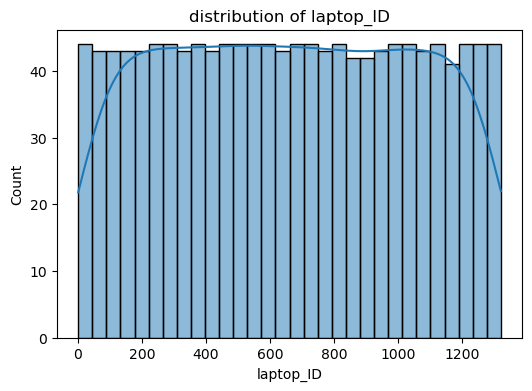

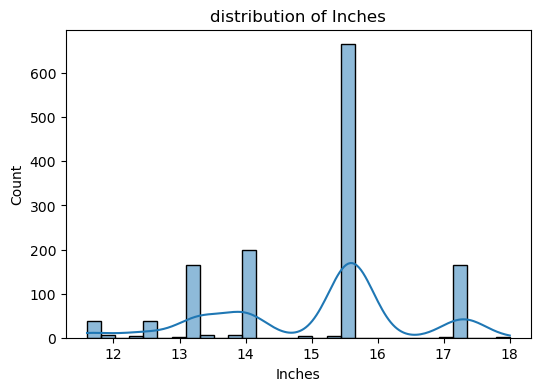

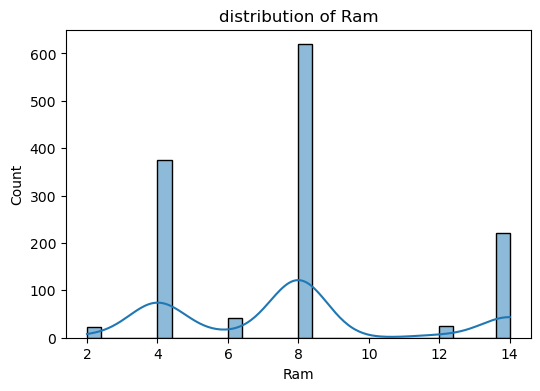

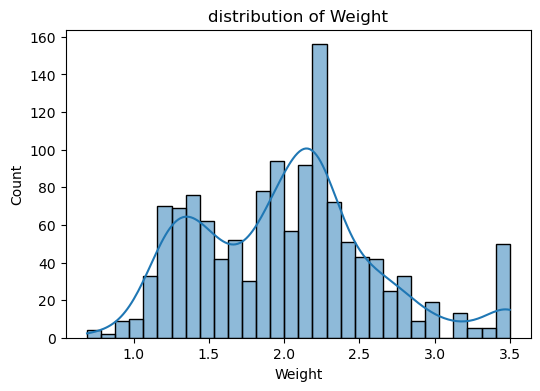

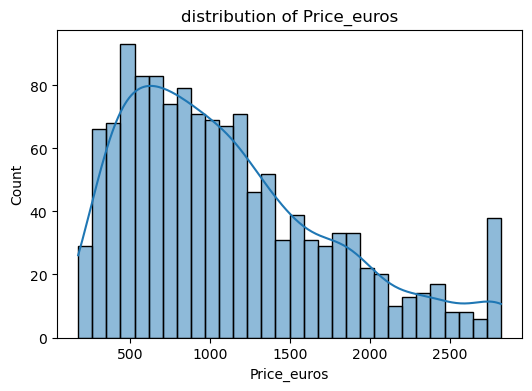

In [12]:
# Visualisations  

# Histograms for numeric features
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df_encoded[col], kde=True, bins=30)
    plt.title(f'distribution of {col}')
    plt.show()

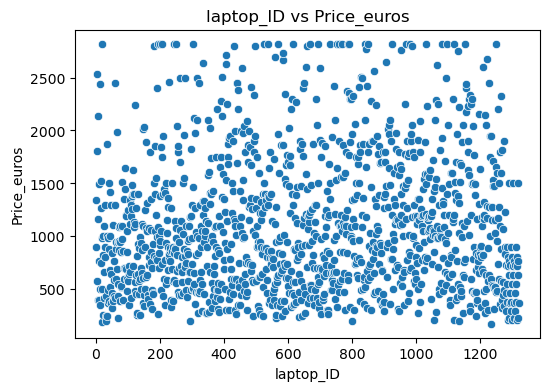

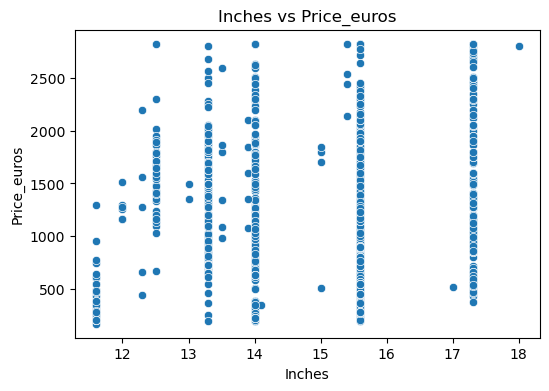

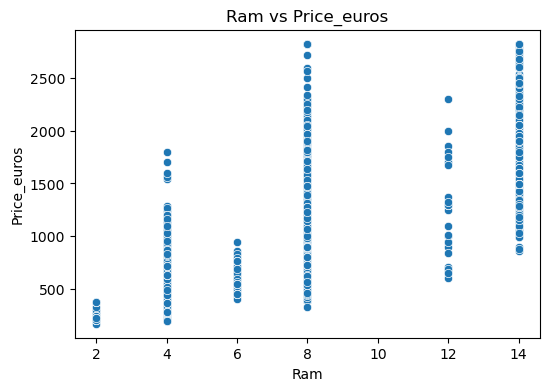

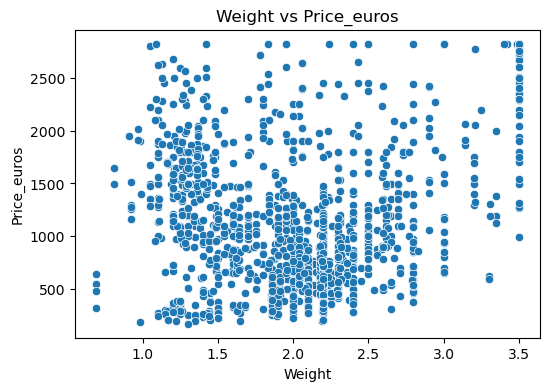

In [13]:
# Scatter plots with price
for col in num_cols[:-1]:  # exclude price itself
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df_encoded[col], y=df_encoded['Price_euros'])
    plt.title(f'{col} vs Price_euros')
    plt.show()

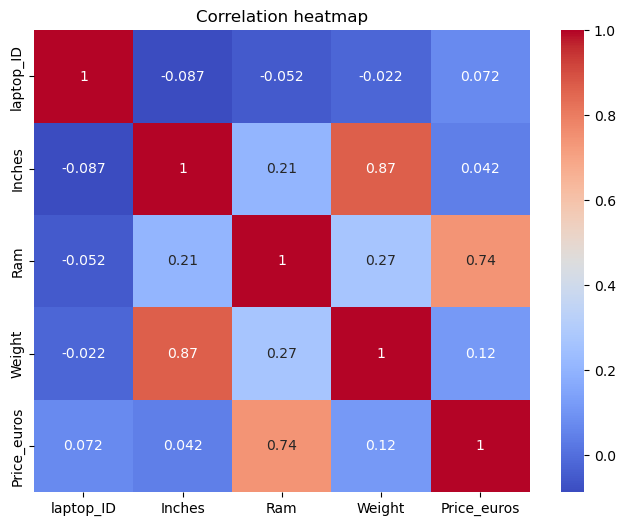

In [14]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_original[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()

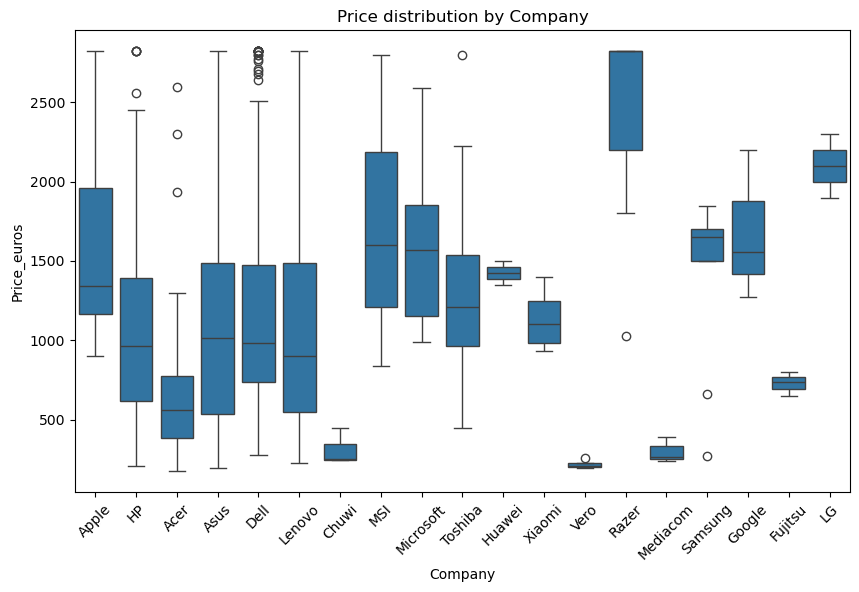

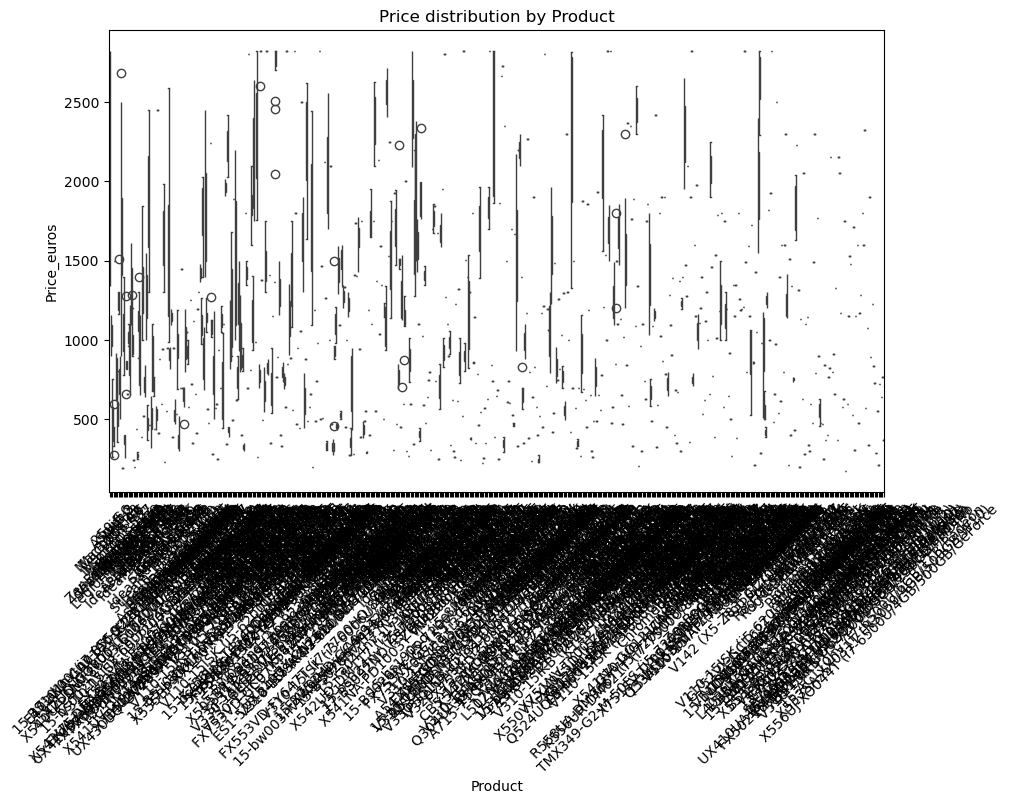

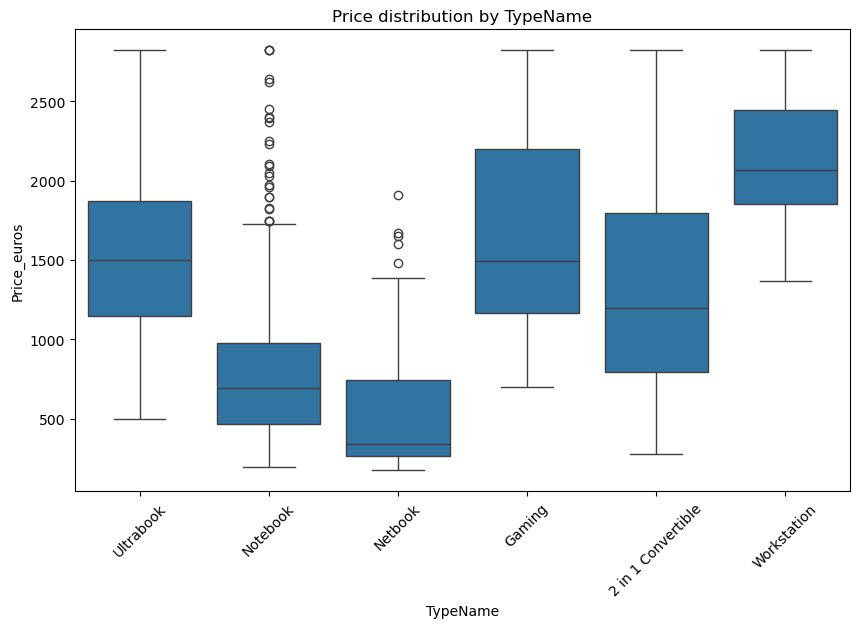

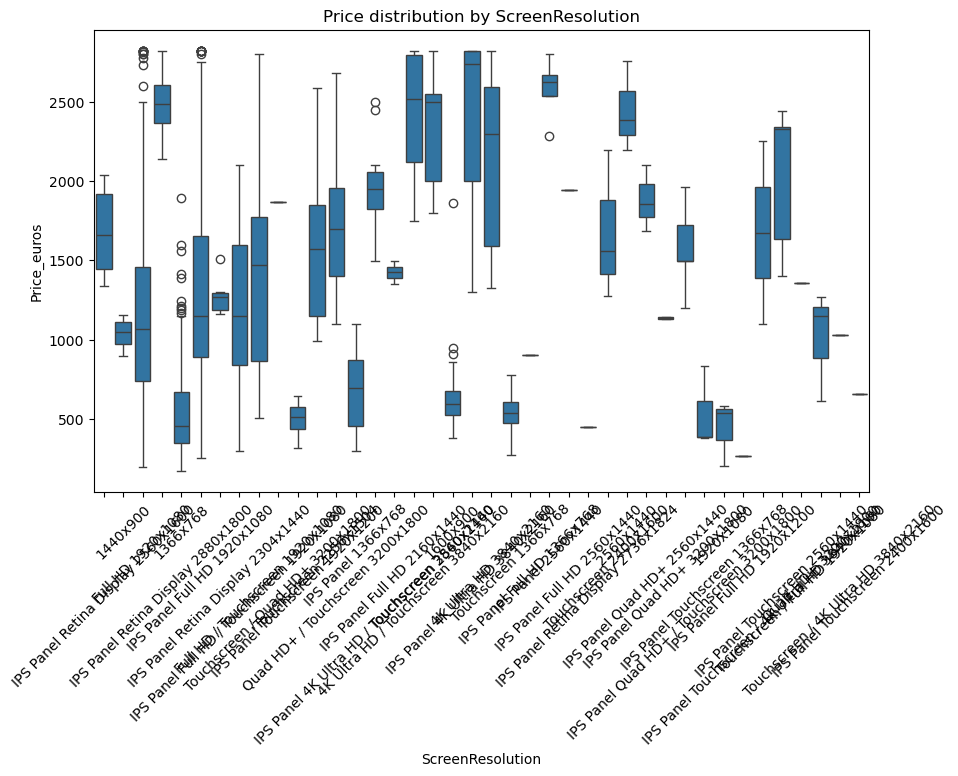

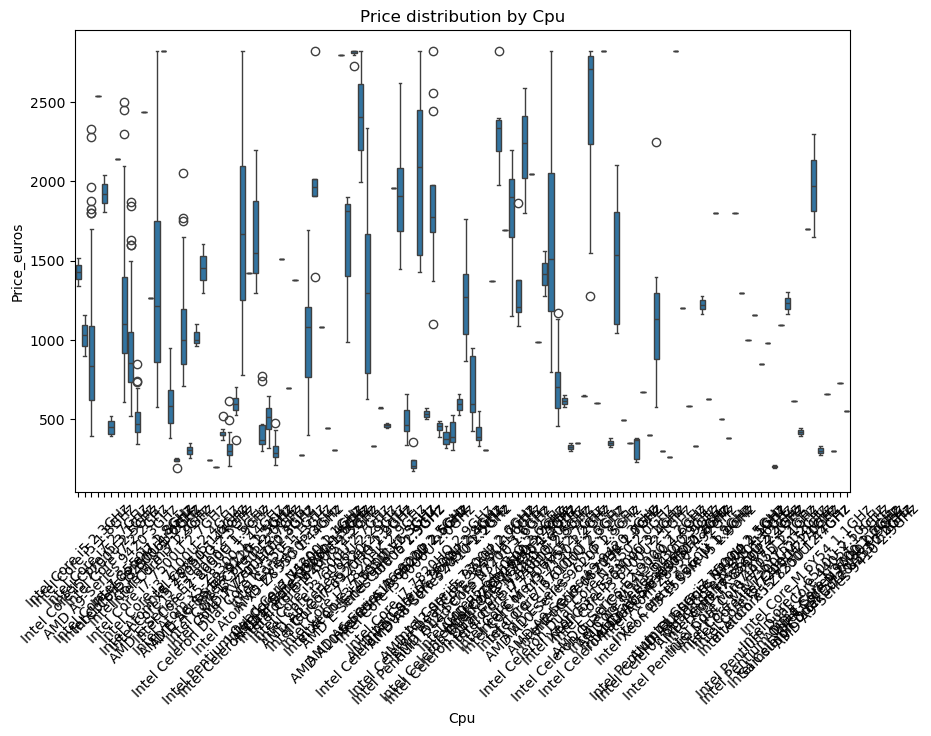

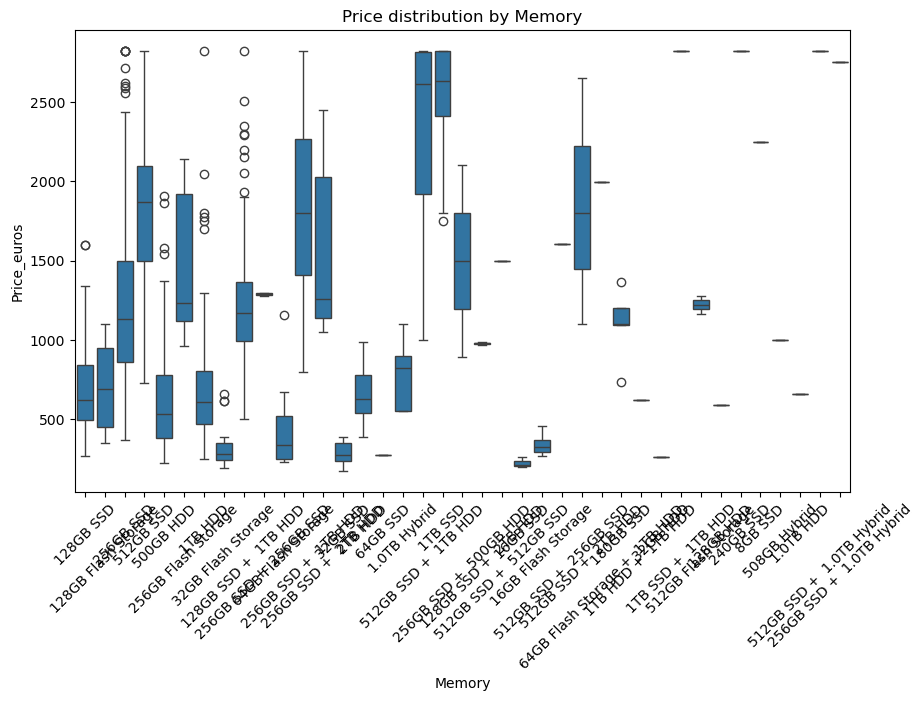

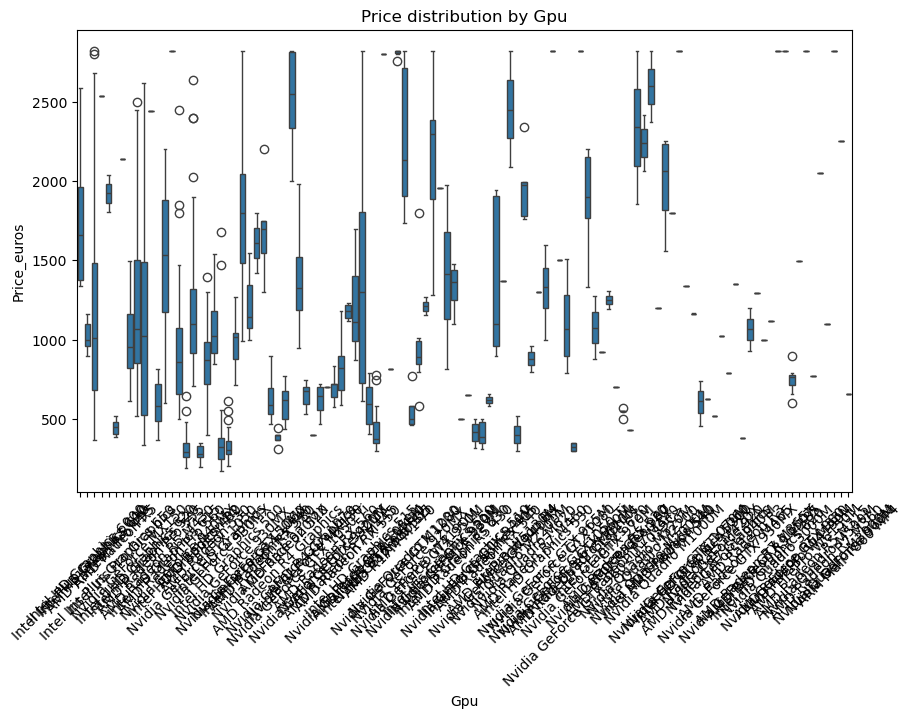

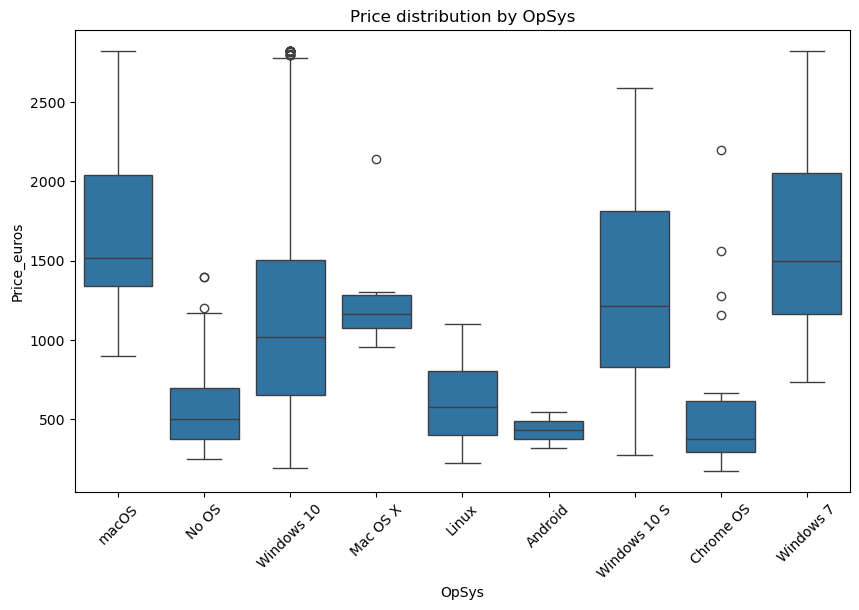

In [15]:
# Boxplots of categorical features
cat_cols_original = df_original.select_dtypes(include='object').columns
for col in cat_cols_original:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=col, y='Price_euros', data=df_original)
    plt.title(f'Price distribution by {col}')
    plt.xticks(rotation=45)
    plt.show()

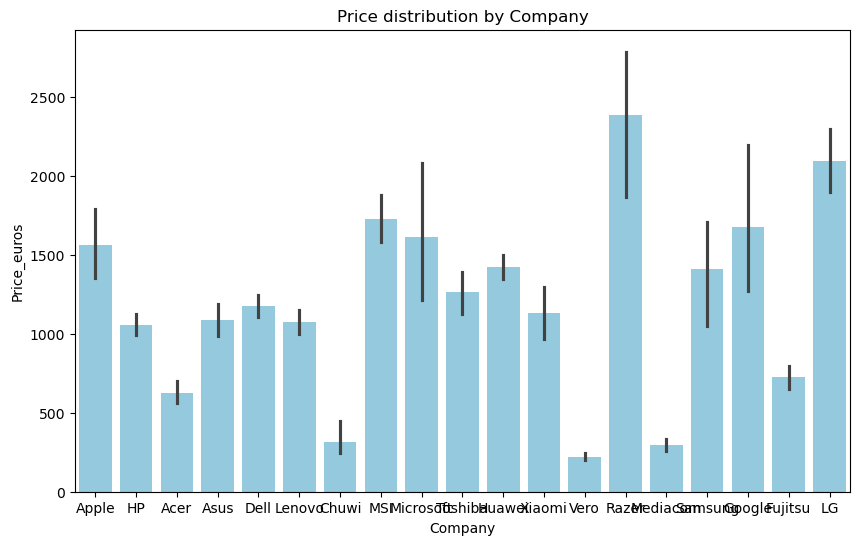

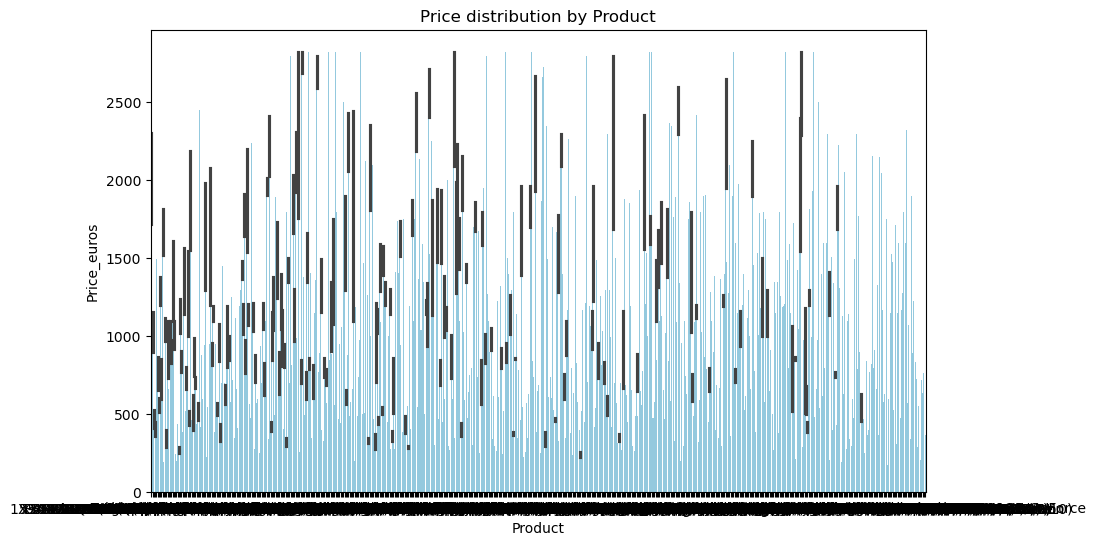

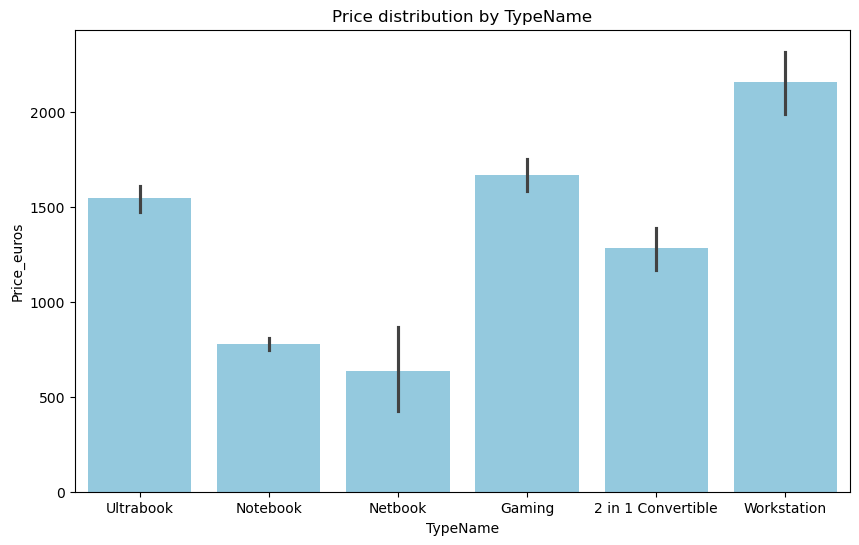

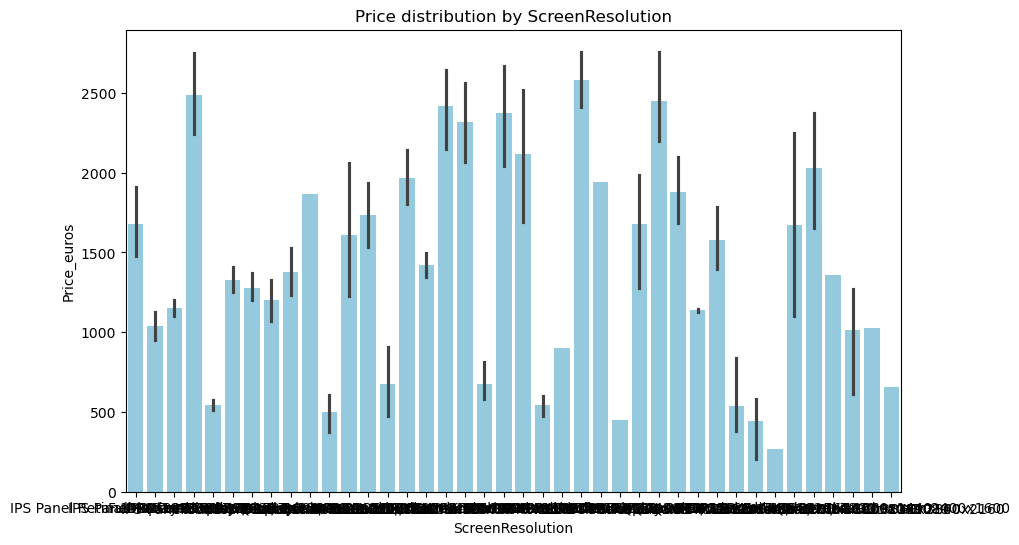

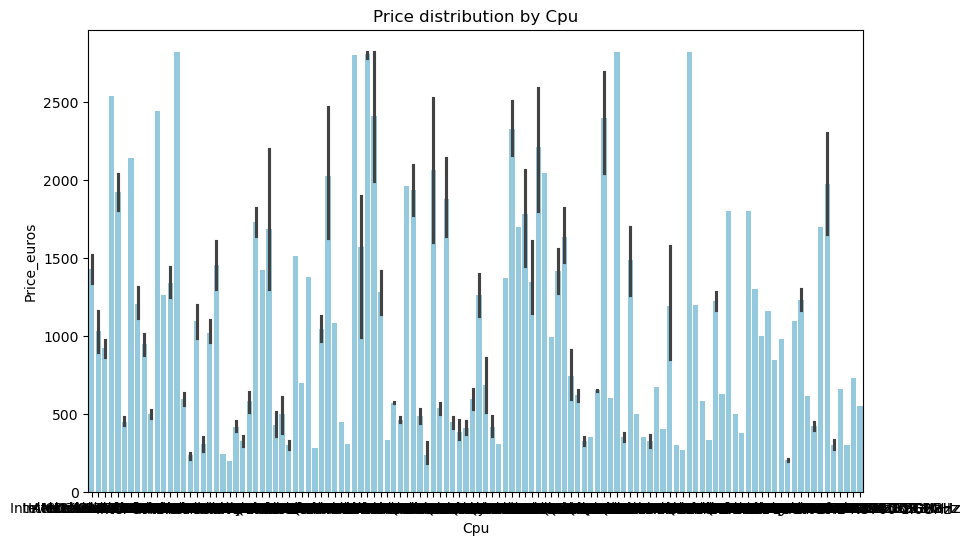

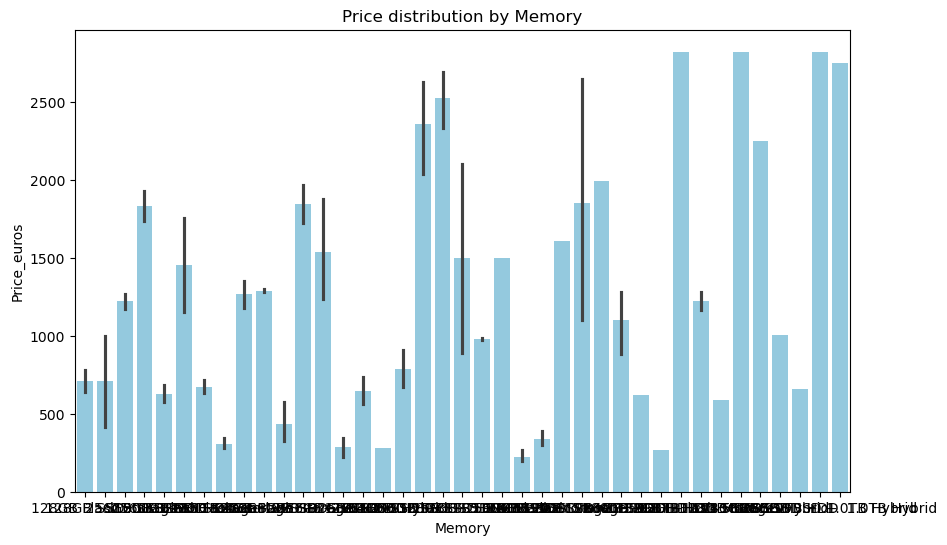

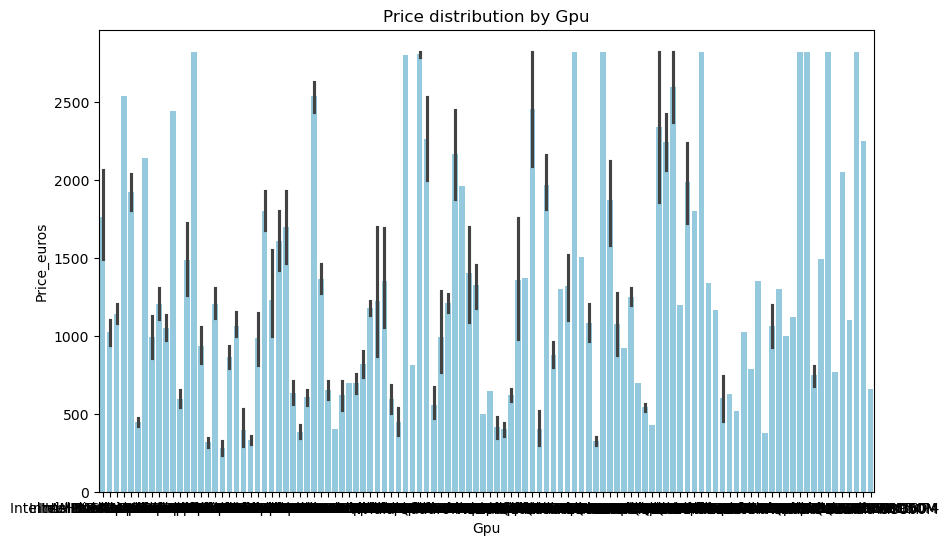

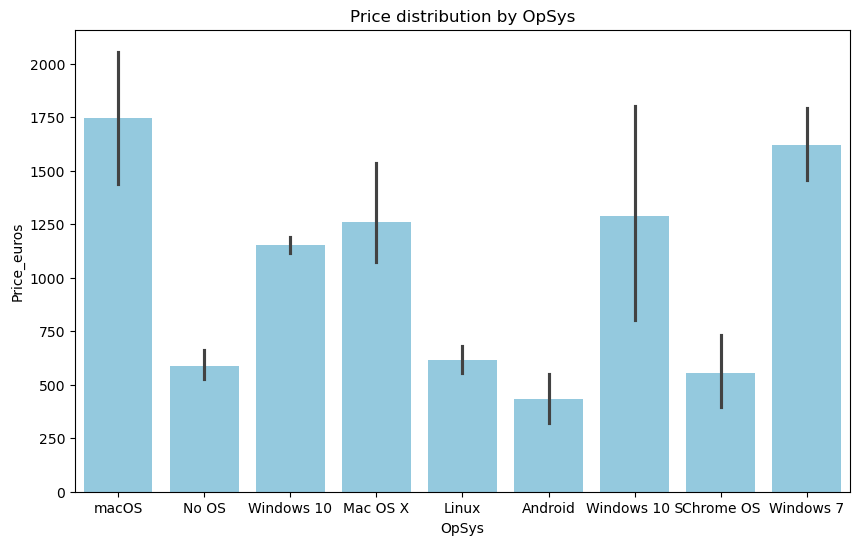

In [16]:
# Bar plots of ctaegorical features
for col in cat_cols_original:
    plt.figure(figsize=(10,6))
    sns.barplot(data=df_original, x= col, y='Price_euros', estimator='mean',color="skyblue")
    plt.title(f'Price distribution by {col}')
    plt.show()

In [17]:
# Identify Influential Factors

# Using correlation and categorical groupby means
print("Numeric correlations with price:")
print(df_original[num_cols].corr()['Price_euros'].sort_values(ascending=False))


# Get Average of top categorical features
# Company average price
print("\nAverage price by Company:")
print(df_original.groupby('Company')['Price_euros'].mean().sort_values(ascending=False))

# TypeName average price
print("\nAverage price by TypeName:")
print(df_original.groupby('TypeName')['Price_euros'].mean().sort_values(ascending=False))

# OpSys average price
print("\nAverage price by OpSys:")
print(df_original.groupby('OpSys')['Price_euros'].mean().sort_values(ascending=False))

Numeric correlations with price:
Price_euros    1.000000
Ram            0.741961
Weight         0.115558
laptop_ID      0.071860
Inches         0.042062
Name: Price_euros, dtype: float64

Average price by Company:
Company
Razer        2387.400000
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1562.446190
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1174.684882
Xiaomi       1133.462500
Asus         1088.047848
Lenovo       1075.267273
HP           1056.633978
Fujitsu       729.000000
Acer          626.775825
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price_euros, dtype: float64

Average price by TypeName:
TypeName
Workstation           2157.977586
Gaming                1669.132732
Ultrabook             1546.620153
2 in 1 Convertible    1282.378512
Notebook               778.774085
Netbook                636.232000
Name: Price_euros, dtype: fl

# Influential Factors Affecting Laptop Prices

1.	**RAM Size**
- Statistical Result: RAM has the highest correlation with price (0.74).

- Observation: As RAM increases, laptop prices rise significantly.

- Visualization: Scatter plots show a strong upward trend.

👉 RAM is the most important numeric factor.


2.	**Company(Brand)**
- Statistical Result: Average prices differ a lot across brands.
Razer (2387), LG (2099), MSI (1729), Apple (1562) are the most expensive.
Acer (627), Chuwi (314), Mediacom (295) are much cheaper.

- Visualization: Boxplots show premium brands consistently higher.

👉 Brand reputation and target market strongly affect price.


3.	**Laptop Type**
- Statistical Result:
Workstations (2158), Gaming (1669), Ultrabooks (1547) are the highest.
Notebooks (779) and Netbooks (636) are lowest.

- Visualization: Barplots highlight clear gaps between categories.

👉 Laptop type (intended use) is a key determinant of price.


4.	**Operating System**
- Statistical Result:
macOS (1747) and Windows (1622) are high.
Linux (617), Chrome OS (554), Android (434) are low.

- Visualization: Barplots confirm macOS/Windows dominate premium range.

👉 OS matters, but less than RAM, brand, and type.

**Final Summary**

The most influential factors are:
1.	RAM > 2. Company (Brand) > 3. Laptop Type > 4. Operating System

RAM size has the strongest effect on price.
Company and Laptop Type also play a major role.
Operating System has some influence but is secondary.

# Feature Engineering

In [18]:
# Creation of new features

# 1. log transformation of price
df_original['Log_price'] = np.log(df_original['Price_euros'])

# 2. screen area (approximation using diagonal inches²)
# (better: assume 16:9 aspect ratio, area ≈ (0.87 * inches)^2)
df_original['Screen_area'] = (0.87 * df_original['Inches']) ** 2

# 3. price per GB of ram
df_original['Price_per_GB'] = df_original['Price_euros'] / df_original['Ram']

# 4. portability index (weight per inch)
df_original['Portability'] = df_original['Weight'] / df_original['Inches']

# 5. is_touchscreen
# check if ‘touchscreen’ appears in screenresolution column
df_original['Is_touchscreen'] = df_original['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in str(x) else 0)

# 6. simplified os categories
def categorize_os(os):
    if 'mac' in os.lower():
        return 'MacOs'
    elif 'windows' in os.lower():
        return 'Windows'
    elif 'linux' in os.lower():
        return 'Linux'
    else:
        return 'other'
df_original['OS_category'] = df_original['OpSys'].apply(categorize_os)

# 7. gaming / workstation flags
df_original['Is_gaming'] = df_original['TypeName'].apply(lambda x: 1 if x == 'Gaming' else 0)
df_original['Is_workstation'] = df_original['TypeName'].apply(lambda x: 1 if x == 'Workstation' else 0)


# check new features
print(df_original.head())

   laptop_ID Company      Product   TypeName  Inches  \
0        1.0   Apple  MacBook Pro  Ultrabook    13.3   
1        2.0   Apple  Macbook Air  Ultrabook    13.3   
2        3.0      HP       250 G6   Notebook    15.6   
3        4.0   Apple  MacBook Pro  Ultrabook    15.4   
4        5.0   Apple  MacBook Pro  Ultrabook    13.3   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8.0   
1                            1440x900        Intel Core i5 1.8GHz   8.0   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8.0   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  14.0   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8.0   

                Memory                           Gpu  ... Weight  Price_euros  \
0            128GB SSD  Intel Iris Plus Graphics 640  ...   1.37      1339.69   
1  128GB Flash Storage        Intel HD Graphics 60

## Feature Engineering and Justification

To improve the predictive power of the dataset, I created several new features from the existing columns. Below is a summary of the engineered features and why they might be useful:

1. **Log_Price**  
   - Transformation of `Price_euros` using the natural log.  
   - Justification: Reduces skewness of the target variable and helps linear models capture relative (percentage) changes better than absolute changes.

2. **Screen_Area**  
   - Approximated as `(0.87 * Inches)²`, assuming a standard 16:9 aspect ratio.  
   - Justification: Screen size directly affects laptop price, and area provides a more realistic measure of usability than diagonal inches alone.

3. **Price_per_GB**  
   - Computed as `Price_euros / Ram`.  
   - Justification: Provides a normalized measure of how much value the buyer gets for each GB of RAM. This highlights whether high-RAM laptops are overpriced or cost-efficient.

4. **Portability Index**  
   - Defined as `Weight / Inches`.  
   - Justification: Combines weight and screen size to capture portability, which can influence laptop price (e.g., ultrabooks are usually more expensive).

5. **Is_Touchscreen**  
   - Binary flag (1 if the laptop has a touchscreen, 0 otherwise).  
   - Justification: Touchscreen laptops generally fall into premium categories, and this feature can help capture that price effect.

6. **OS_Category**  
   - Simplified operating system categories: *Windows*, *MacOS*, *Linux*, *Other*.  
   - Justification: Some OS types (e.g., MacOS) are associated with consistently higher prices, making OS a strong categorical predictor.

7. **Is_Gaming** and **Is_Workstation**  
   - Binary flags based on `TypeName`.  
   - Justification: Gaming and workstation laptops represent high-performance segments with distinct pricing patterns. These flags help separate them from regular consumer laptops.


### Summary
These engineered features provide:
- **Better representation of continuous variables** (e.g., Log_Price, Screen_Area).  
- **Normalized measures for comparison** (e.g., Price_per_GB, Portability).  
- **Meaningful categorical distinctions** (e.g., OS_Category, Is_Gaming).  

Together, they are expected to improve model performance by capturing hidden relationships and making patterns in the data more explicit.




In [19]:
# Copy the original dataset with engineered features
df_model = df_original.copy()
cat_cols_original = df_model.select_dtypes(include = ['object','category']).columns
print (cat_cols_original)
# Applying Encoding to each categorical column 
for col in cat_cols_original:
    if df_model[col].nunique() <= 2:
        le = LabelEncoder()
        idf_model[col] = le.fit_transform(df_model[col])
    else:
        Ohe = pd.get_dummies(df_model[col],prefix=col)
        df_model = pd.concat([df_model.drop (col,axis= 1),Ohe],axis=1)

bool_cols = df_model.select_dtypes(include = ['bool']).columns
df_model[bool_cols] = df_model[bool_cols].astype(int)
print(df_model.head(5))

Index(['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory',
       'Gpu', 'OpSys', 'OS_category'],
      dtype='object')
   laptop_ID  Inches   Ram  Weight  Price_euros  Log_price  Screen_area  \
0        1.0    13.3   8.0    1.37      1339.69   7.200194   133.888041   
1        2.0    13.3   8.0    1.34       898.94   6.801216   133.888041   
2        3.0    15.6   8.0    1.86       575.00   6.354370   184.199184   
3        4.0    15.4  14.0    1.83      2537.45   7.838915   179.506404   
4        5.0    13.3   8.0    1.37      1803.60   7.497540   133.888041   

   Price_per_GB  Portability  Is_touchscreen  ...  OpSys_Mac OS X  \
0    167.461250     0.103008               0  ...               0   
1    112.367500     0.100752               0  ...               0   
2     71.875000     0.119231               0  ...               0   
3    181.246429     0.118831               0  ...               0   
4    225.450000     0.103008               0  ...               0

# Model Building: Linear Regression

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# features (x) and target (y)
# use engineered + encoded dataframe
x = df_model.drop(columns=['Price_euros'])   # drop target
y = df_model['Price_euros']                  # target variable

# train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=28)

# model initialization & training
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

# predictions
y_pred = lin_reg.predict(x_test)
y_train_pred = lin_reg.predict(x_train)
r2_train = r2_score(y_train,y_train_pred)
print(r2_train)

0.9967922895719094


# Model Evaluation

In [26]:
Rmse = np.sqrt(mean_squared_error(y_test,y_pred))
Mae = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)   

print("Linear regession Model Performance:")
print(f"RMSE:{Rmse:.2f}")
print(f"MAE:{Mae:.2f}")
print(f"R^2 Score:{R2:.2f}")

Linear regession Model Performance:
RMSE:136.06
MAE:96.15
R^2 Score:0.95


In [27]:
import joblib
# Save the model to a file 
joblib.dump(lin_reg,'linear_regression_model.pkl')

['linear_regression_model.pkl']

In [29]:
#Save the model columns
import pickle
lr_model_columns = df_model.drop('Price_euros',axis=1).columns # assuming 'price' is target
with open("lr_model_columns.pkl",'wb')as f:
    pickle.dump(lr_model_columns,f)

# Model deployment and Basic Integration(Streamlit)

In [ ]:
#app.py
import streamlit as st
# Load your trained model
Model = joblib.load('linear_regression_model.pkl')

st.title("Laptop Price Predictor")
st.write('Enter laptop features to predict the price:')

# Load the training columns
training_columns = joblib.load("lr_model_columns.pkl")

# User Inputs
company = st.selectbox('company', ['HP', 'Dell', 'MacOS', 'Lenovo', 'Asus'])
ram = st.selectbox('RAM (GB)', [2,4, 8, 12,16])
opsys = st.selectbox('Operating System', ['Windows', 'MacOS', 'Linux', 'Other'])
typename = st.selectbox('Laptop Type',['Workstations','Gaming','Ultrabooks','Notebooks','Netbooks'])

# Convert input into a DataFrame
user_input = pd.DataFrame({'Company': [company],'Ram': [ram],'OpSys': [opsys],'TypeName' : [typename]})

# Encoding (simplest approach) 
user_input_encoded = pd.get_dummies(user_input)

# Ensure same columns as training 
for col in training_columns:
    if col not in user_input_encoded:
        user_input_encoded[col] = 0
        
# Reorder columns
user_input_encoded = user_input_encoded[training_columns]

# Predict and display 
if st.button('Predict Price'):
    price = Model.predict(user_input)
    st.success(f'Predicted Laptop Price: ₦{price[0]:.2f}')

# Streamlit App Note
Although I included a cell containing the streamlit application in this notebook, I did not proceed deploy the app.
The main reason is that during testing,the deployed app produced **Negative Prices** which are not meaningful in this context.
The app was later deployed using random forest regression